In [4]:
#pip install imageio scikit-image matplotlib
from imageio.v2 import imread
import skimage
import matplotlib.pyplot as plt

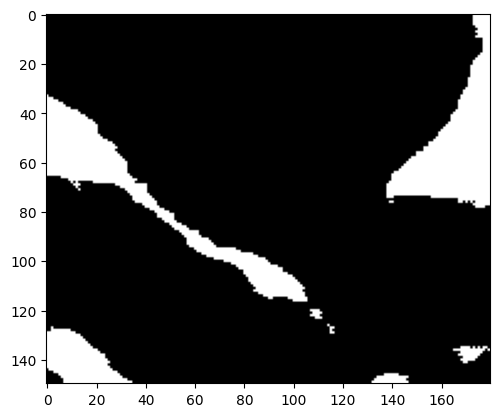

In [58]:
# Read image as 1 dimension binary image
FILE_PATH = 'data/cropped/cropped_22.bmp'
file_name = FILE_PATH.split('/')[-1]
im = imread('data/cropped/cropped_22.bmp', as_gray=True)
im[im == 255] = 1
plt.imshow(im*255, cmap="gray")

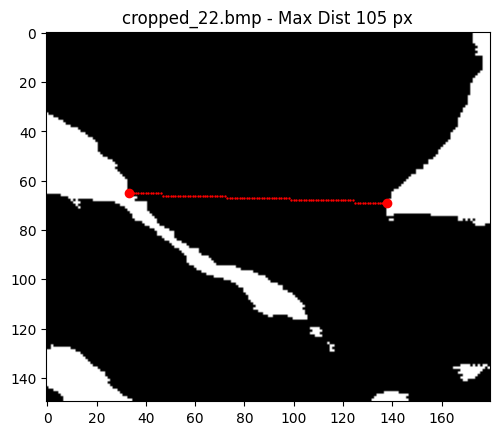

In [59]:
def calculate_distance(x1, y1, x2, y2):
    """Calculate the distance between two points
    Args:
        x1 (float): x1 coordinate
        y1 (float): y1 coordinate
        x2 (float): x2 coordinate
        y2 (float): y2 coordinate
    Returns:
        float: distance between the two points
    """
    return ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5


def find_left_boundary(image):
    # instantiate a list of tuples with 3 values
    # (x, y, distance)
    all_lines = []

    img_shape = image.shape
    # We go down from top left to bottom left
    for x in range(img_shape[0]):
        # If we are in the mask we start to measure a straight line to the right
        if image[x,0] == 1:
            for y in range(img_shape[1]):
                # If we are out of the mask we return the last point
                # That's the coordinates of the last point of the line
                if image[x,y] == 0:
                    x2, y2 = x, y-1
                    all_lines.append((x2, y2, calculate_distance(x, 0, x2, y2)))
                    break
    # We return the point with the highest distance
    return max(all_lines, key=lambda x: x[2])
            
def find_right_boundary(image):
    # instantiate a list of tuples with 3 values
    # (x, y, distance)
    all_lines = []

    img_shape = image.shape
    # We go down from top right to bottom right
    for x in range(img_shape[0]):
        # If we are in the mask we start to measure a straight line to the left
        if image[x,img_shape[1]-1] == 1:
            for y in range(img_shape[1]-1, 0, -1):
                # If we are out of the mask we return the last point
                # That's the coordinates of the last point of the line
                if image[x,y] == 0:
                    x2, y2 = x, y+1
                    all_lines.append((x2, y2, calculate_distance(x, img_shape[1], x2, y2)))
                    break
    # We return the point with the highest distance
    return max(all_lines, key=lambda x: x[2])

def plot_analysis(image, file_name=None):
    fig, ax = plt.subplots()
    left_boundary = find_left_boundary(image)
    right_boundary = find_right_boundary(image)
    x, y = left_boundary[1], left_boundary[0]
    x2, y2 = right_boundary[1], right_boundary[0]
    
    ax.scatter(x, y, c="red")
    ax.scatter(x2, y2, c="red")
    rr, cc = skimage.draw.line(y, x, y2, x2)
    ax.scatter(cc, rr, c="red", s=0.5)
    distance = calculate_distance(x, y, x2, y2)
    ax.imshow(image*255, cmap="gray")
    ax.set_title(f"{file_name} - Max Dist {int(distance)} px")
    return fig, ax, distance

fig, ax, distance = plot_analysis(im, file_name)
fig.show()

/tmp/ipykernel_716279/296600737.py:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


Maximum distance detected is 108.2 pixels from file data/cropped/cropped_42.bmp


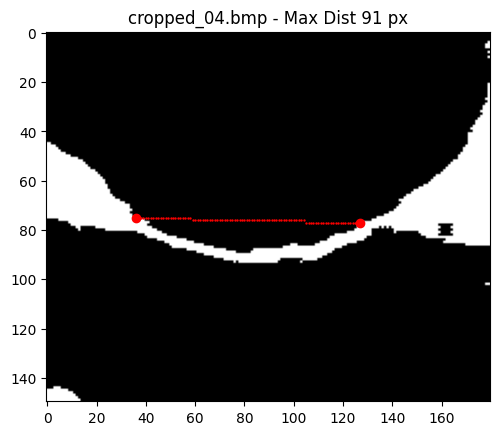

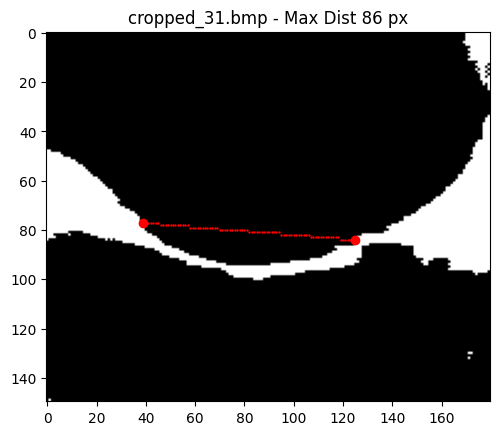

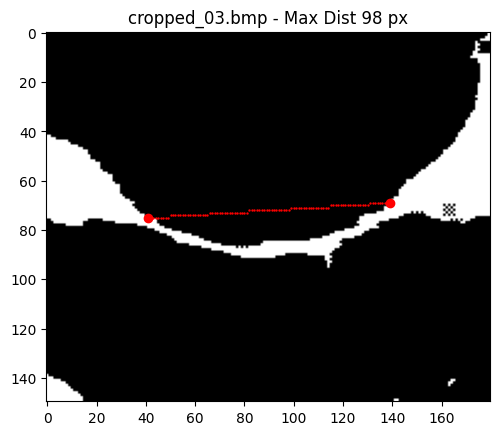

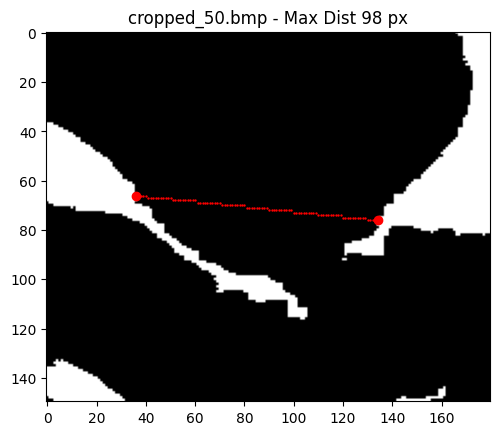

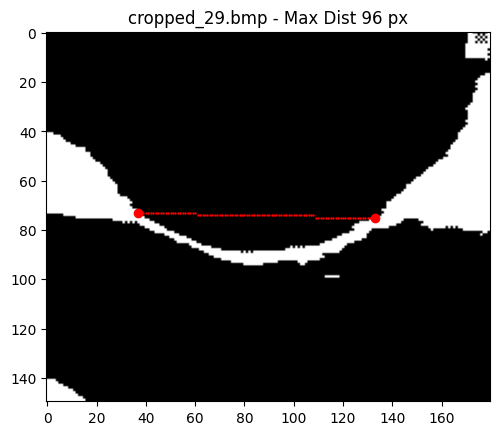

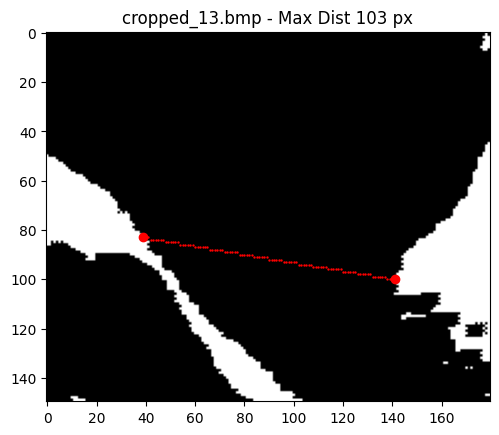

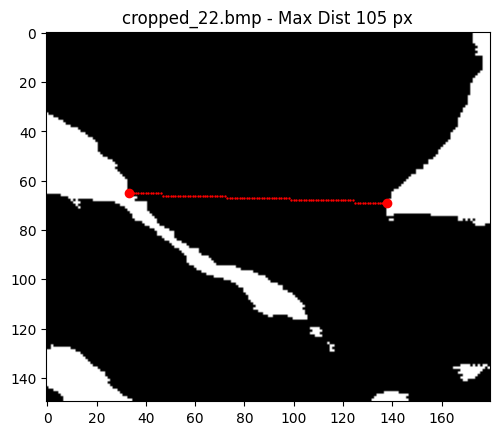

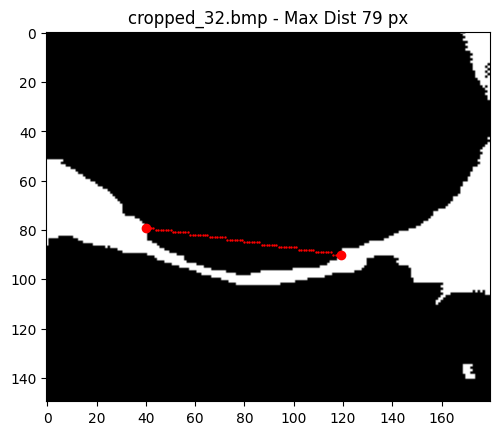

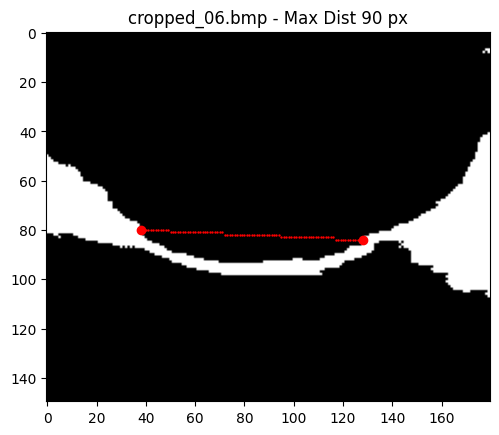

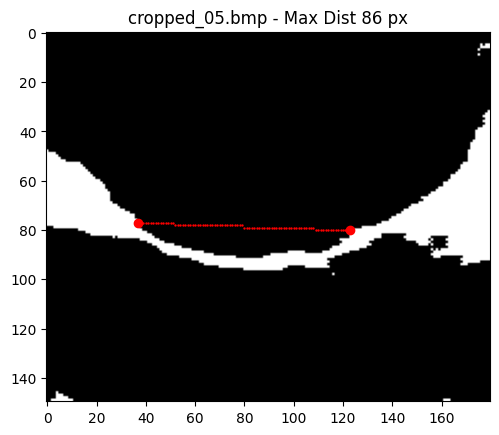

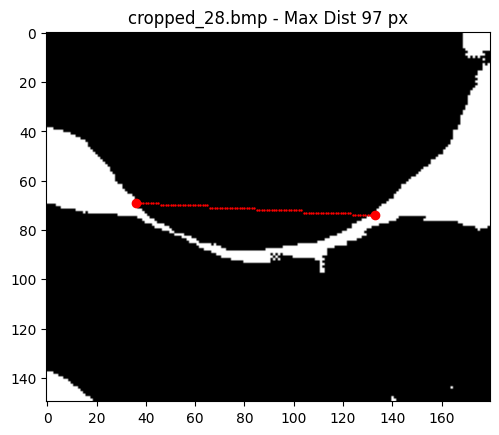

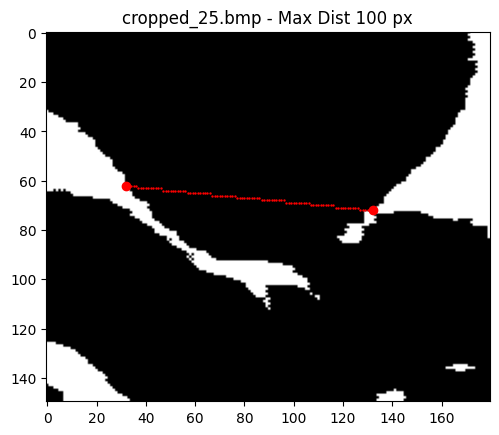

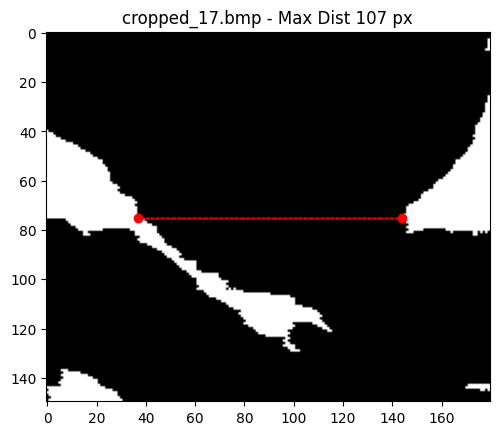

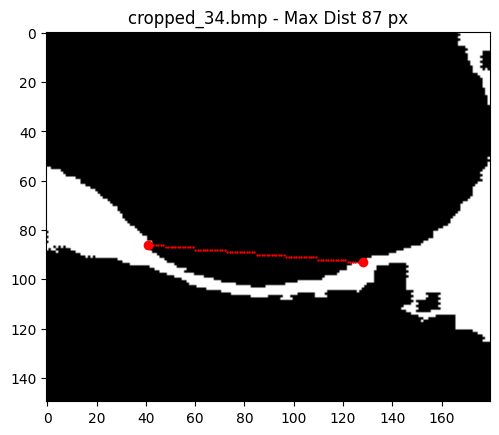

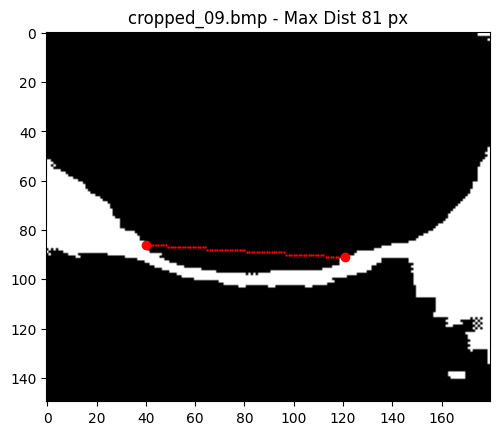

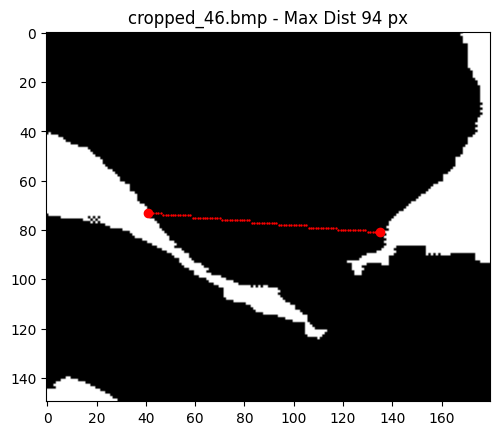

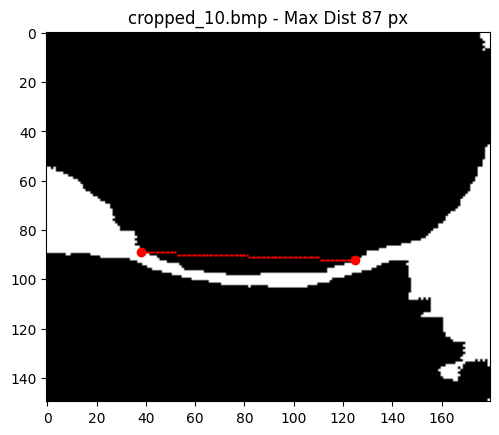

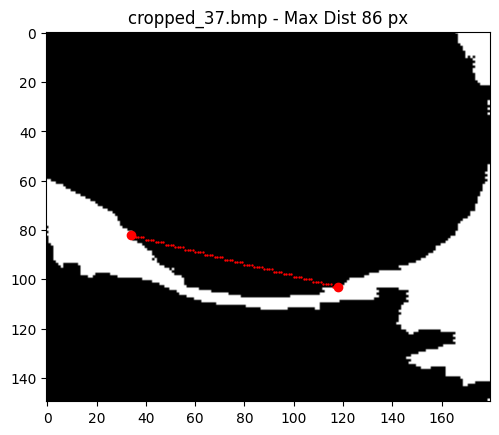

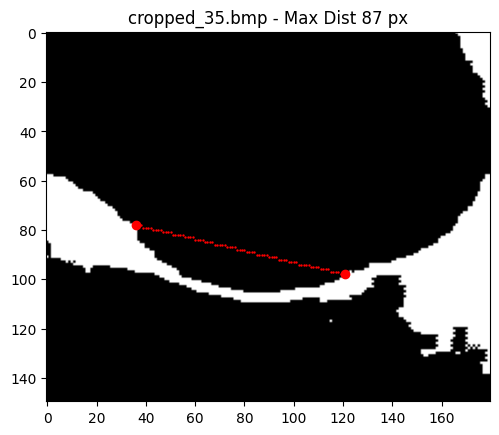

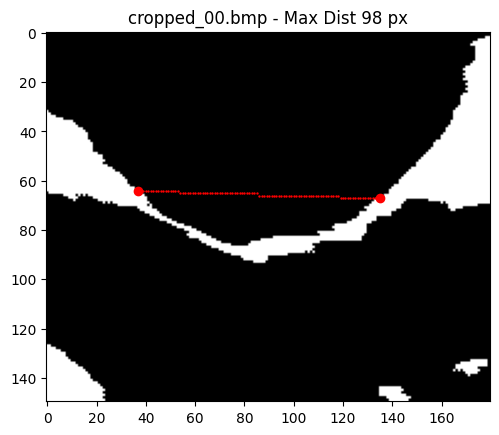

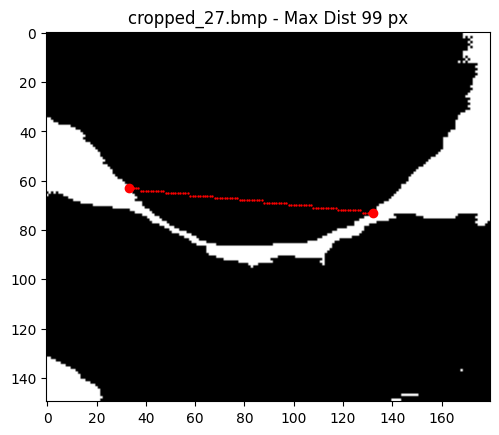

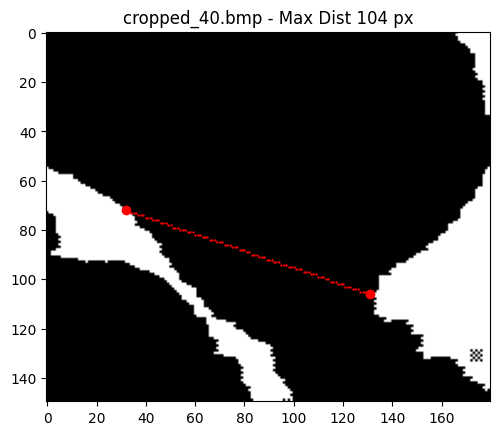

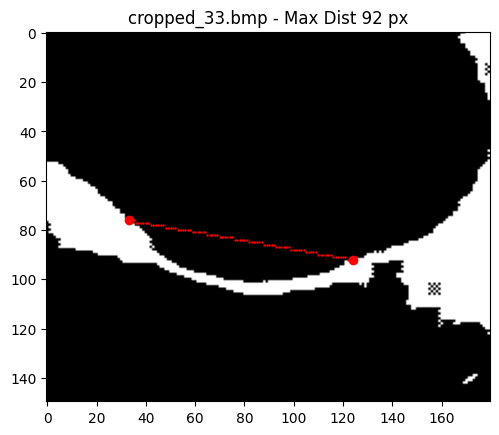

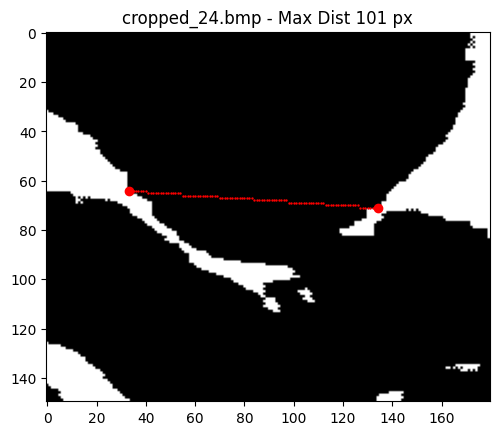

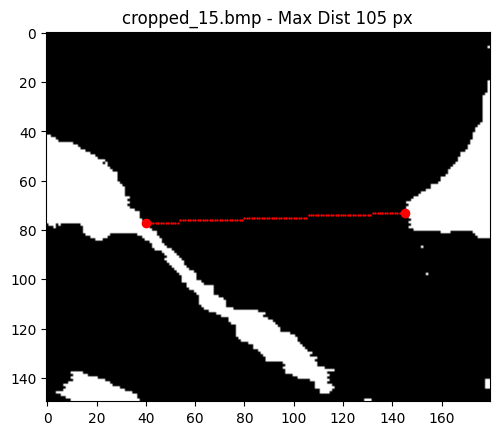

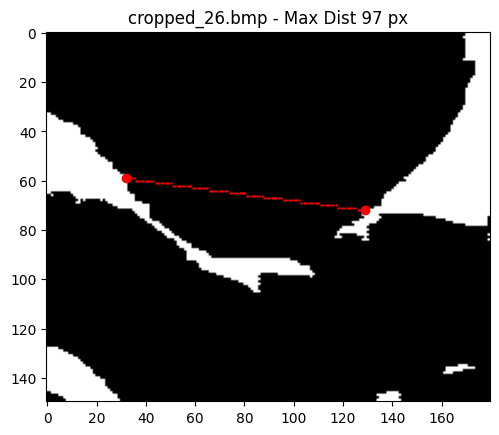

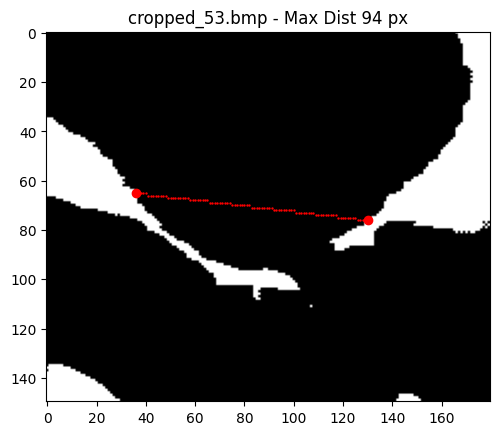

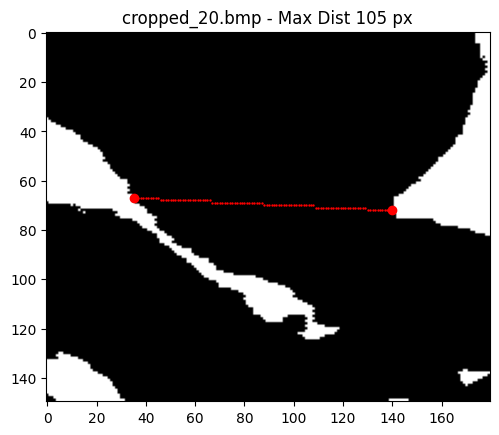

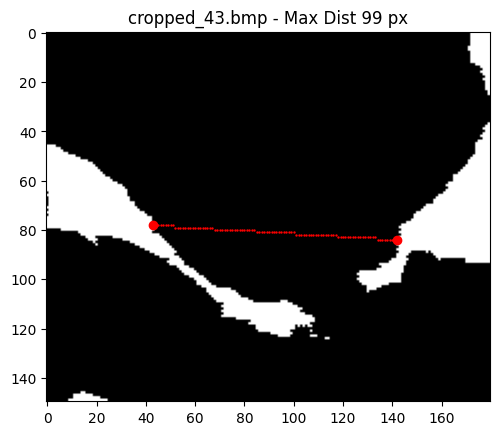

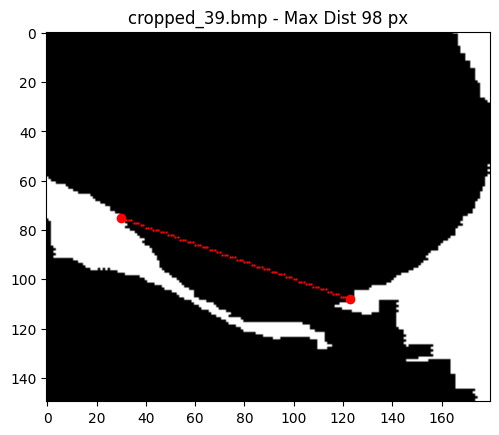

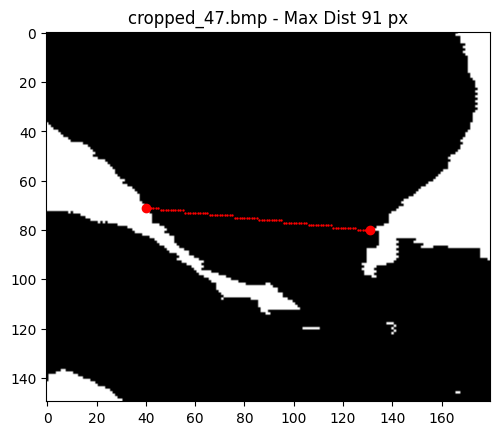

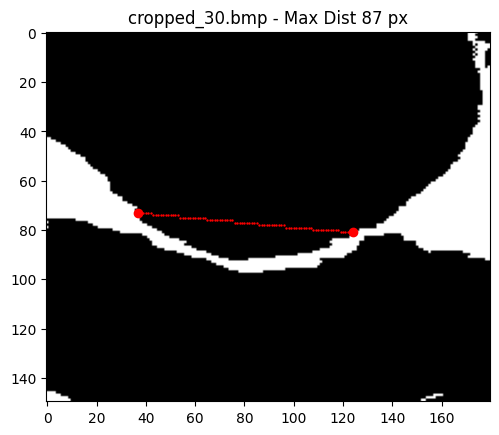

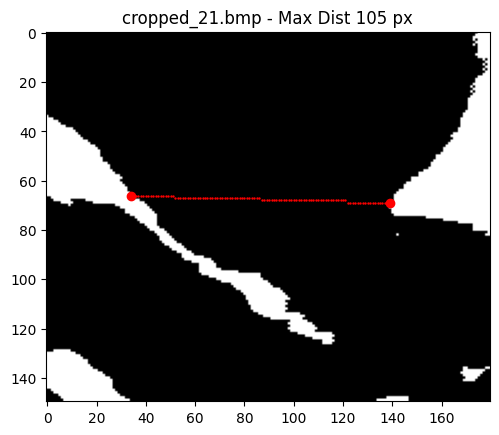

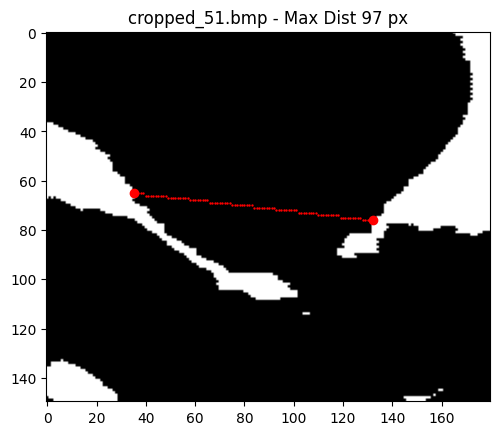

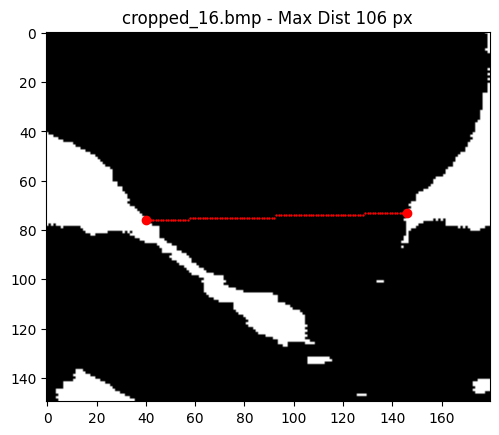

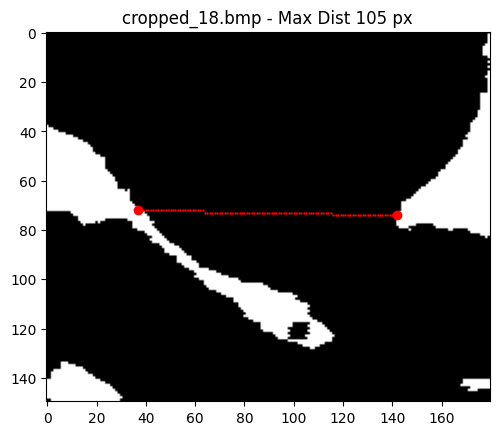

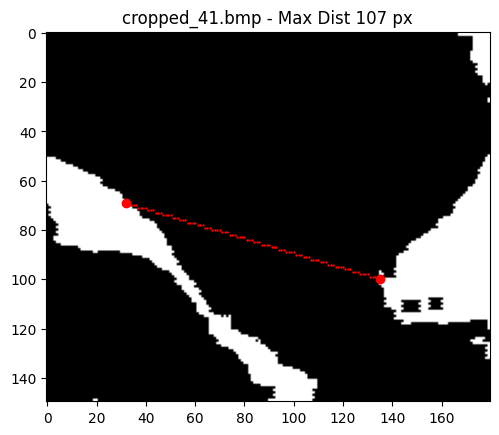

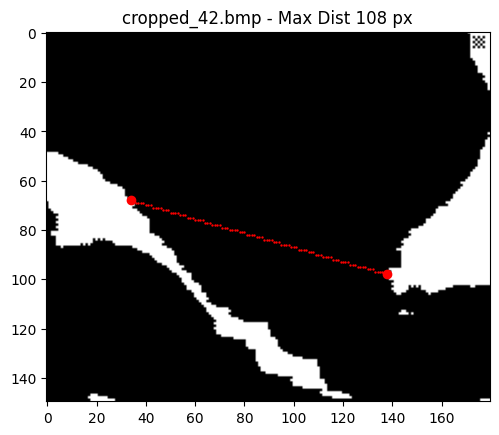

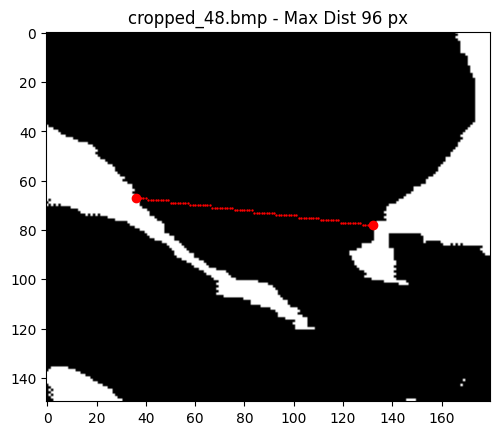

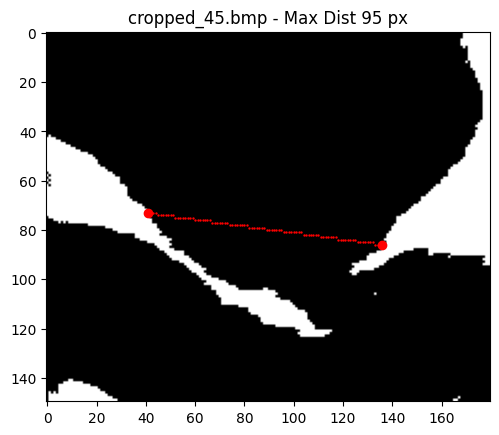

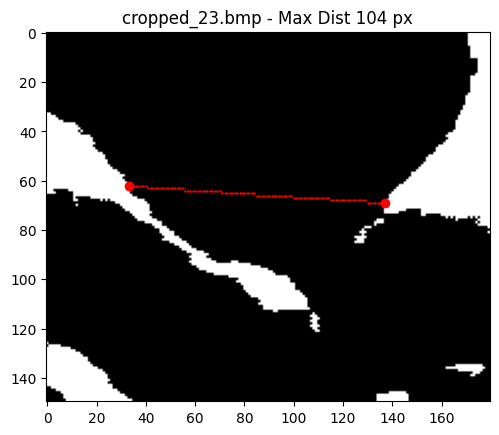

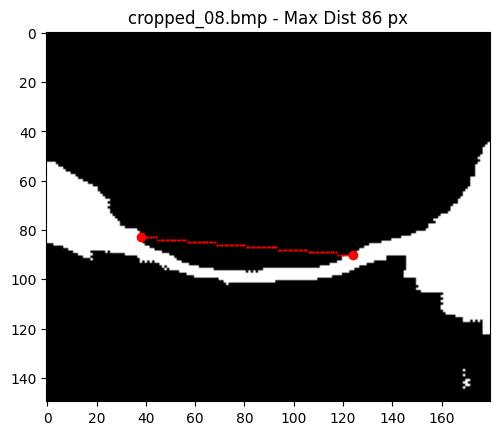

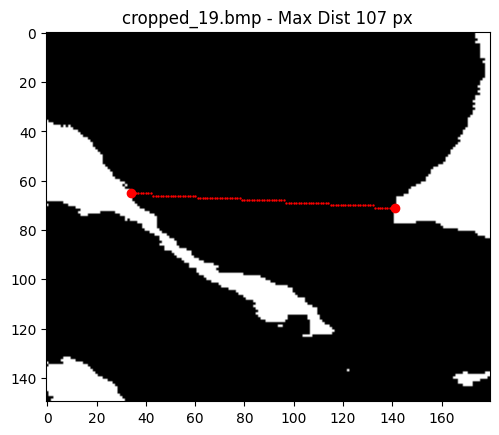

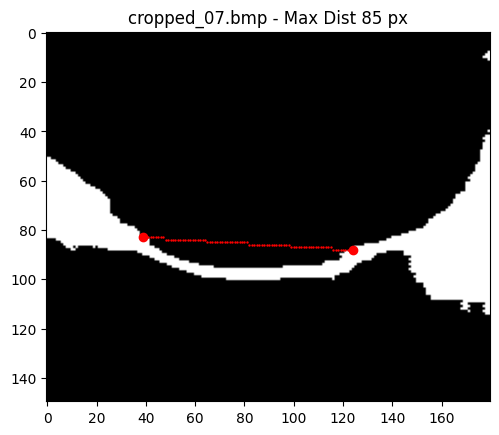

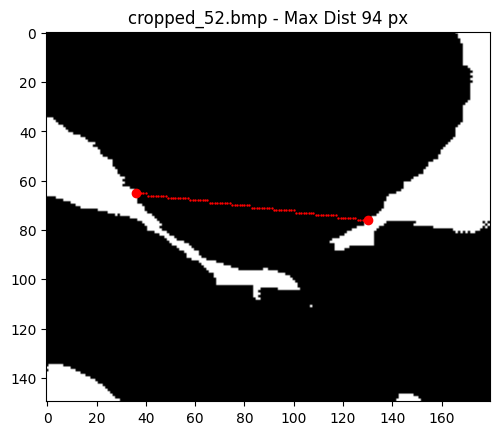

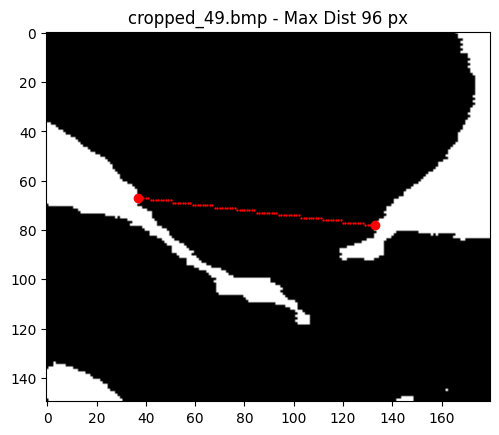

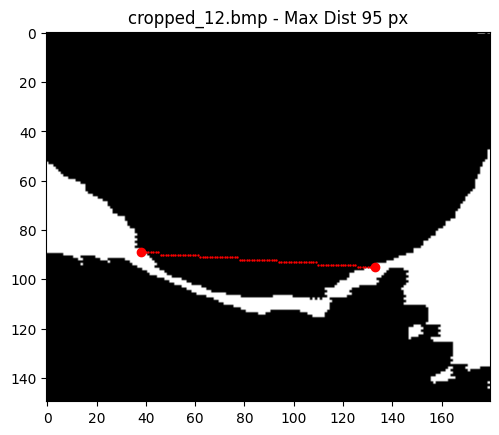

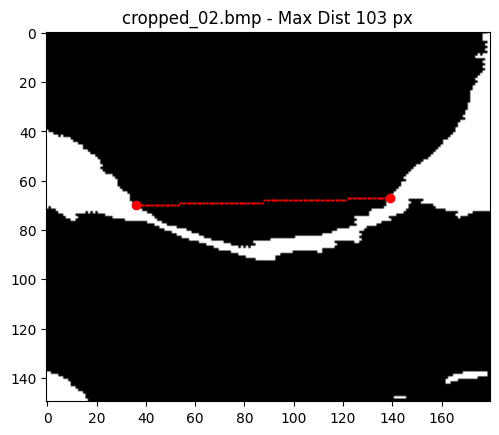

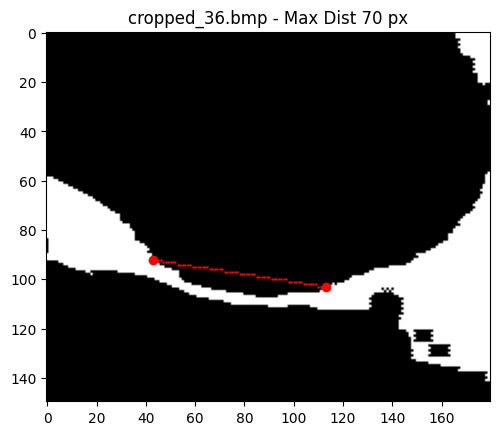

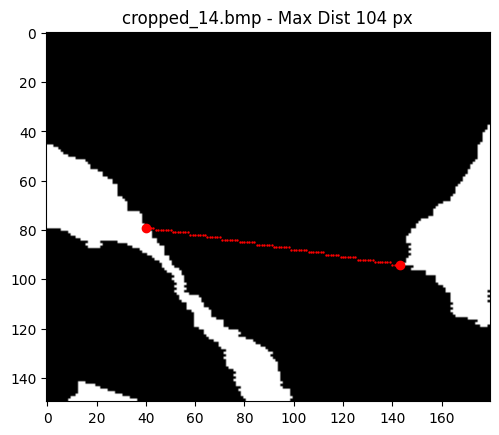

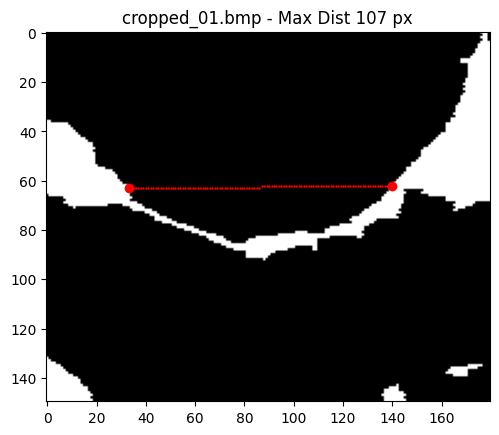

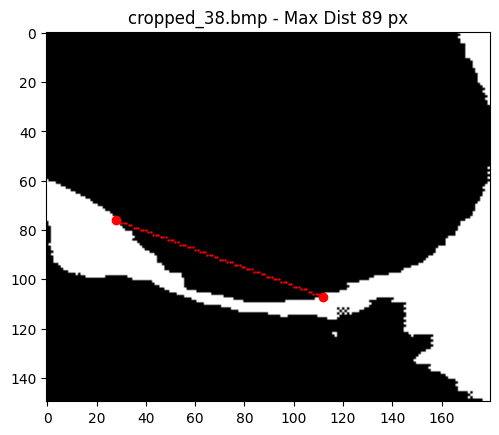

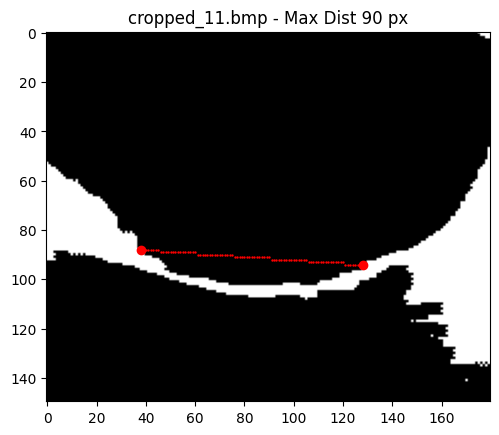

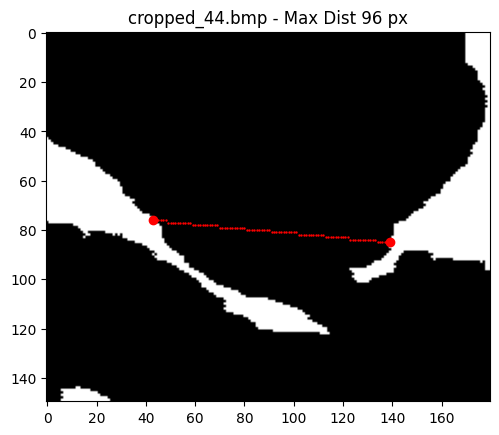

In [60]:
import glob
# list all image in cropped folder
files = glob.glob('data/cropped/*.bmp')
all_distances = []
for file in files:
    file_name = file.split('/')[-1]
    im = imread(file, as_gray=True)
    im[im == 255] = 1
    fig, ax, dist = plot_analysis(im, file_name)
    all_distances.append((file, dist))
    fig.show()
# Print maximum distance with file name
max_distance = max(all_distances, key=lambda x: x[1])
print(f"Maximum distance detected is {round(max_distance[1],1)} pixels from file {max_distance[0]}")